# IMPORTATIONS

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16.0, 10.0)

In [2]:
# plot an image
def plotImage(path):
    image = mpimg.imread(path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# WEEK 05

In [1]:
import pymongo
import pandas as pd
import os
import pandas as pd
os.system('mongod')
import sqlite3 as lite

## Exercise 5.1


 
### sqlite

Establish connection to this database in Python (use the sqlite3 module). Document the connection by making some simple queries.

In [3]:
conn = lite.connect('northwind.db') # path to db file
c = conn.cursor()
for row in c.execute("SELECT * FROM Shippers"):
    print row
    
# This query selects all Shippers from our database.

(1, u'Speedy Express', u'(503) 555-9831')
(2, u'United Package', u'(503) 555-3199')
(3, u'Federal Shipping', u'(503) 555-9931')


-------------
### Mongo

To get started, clone this repository into your working directory. Start a running instance of MongoDB* (on command-line: mongod), then run the .sh file in a terminal. This should create a live Mongo database named ‘Northwind’ that you can connect to in Python. Document the connection by making some simple queries.

### answer

We created the database thanks to the  .sh file.

Then we connect python to the database

In [2]:
from pymongo import MongoClient
client = MongoClient()
client = MongoClient('localhost', 27017)

Then we run some queries in order to document the database:
- get the names of the collections:

In [3]:
db = client.Northwind
names = db.collection_names(include_system_collections=False)
for n in names:
    print n

categories
customers
employee-territories
order-details
orders
products
regions
shippers
suppliers
territories


- find ALFKI


In [4]:
for c in list(db.customers.find({"CustomerID": 'ALFKI'})):
    print c
    print

{u'City': u'Berlin', u'ContactTitle': u'Sales Representative', u'CompanyName': u'Alfreds Futterkiste', u'Country': u'Germany', u'Region': u'NULL', u'Fax': u'030-0076545', u'Phone': u'030-0074321', u'ContactName': u'Maria Anders', u'Address': u'Obere Str. 57', u'PostalCode': 12209, u'_id': ObjectId('560adf1eb6e4bb5b6ccda25b'), u'CustomerID': u'ALFKI'}

{u'City': u'Berlin', u'ContactTitle': u'Sales Representative', u'CompanyName': u'Alfreds Futterkiste', u'Country': u'Germany', u'Region': u'NULL', u'Fax': u'030-0076545', u'Phone': u'030-0074321', u'ContactName': u'Maria Anders', u'Address': u'Obere Str. 57', u'PostalCode': 12209, u'_id': ObjectId('560adfc1b6e4bb5b6ccdaf3e'), u'CustomerID': u'ALFKI'}



NB: this example returns 2 results for the customer ALFKI. In fact, all queries return the result twice, in order to avoid this, we use the command find(*).distinct(*) to avoid this problem.


##### The methods SQLite and MongoDB are now connected.

## Exercise 5.2:

#### The customer with customerID ALFKI has made a number of orders containing some products. Query for, and return, all orders made by ALFKI and the products they contain.

### sqlite

To query for all orders made by ALFKI, a JOIN statement is used to join the Orders table with Orders Details Extended. Afterwards, data is fetched by Selecting OrderID, ProductID and ProductName where the customer ID is equal to ALFKI.

In [4]:
conn.text_factory = str # to avoid UTF-8 error
sql = """
SELECT ode.OrderID, ode.ProductID, ode.ProductName
FROM
	Orders as o
	INNER JOIN 
	[Order Details Extended] as ode
	ON o.OrderID=ode.OrderID
	WHERE
		CustomerID = ?"""

c.execute(sql,[('ALFKI')])
data=c.fetchall()
print "All orders made by ALFKI\n"
print "OrderID\tProductID\tProductName\n"
for i in data:
    print i[0],"\t",i[1],"\t\t", i[2]
    
# This query selects and shows the OrderID, the ProductID and the ProductName made my the CustomerID "ALFKI".

All orders made by ALFKI

OrderID	ProductID	ProductName

10643 	28 		R�ssle Sauerkraut
10643 	39 		Chartreuse verte
10643 	46 		Spegesild
10692 	63 		Vegie-spread
10702 	3 		Aniseed Syrup
10702 	76 		Lakkalik��ri
10835 	59 		Raclette Courdavault
10835 	77 		Original Frankfurter gr�ne So�e
10952 	6 		Grandma's Boysenberry Spread
10952 	28 		R�ssle Sauerkraut
11011 	58 		Escargots de Bourgogne
11011 	71 		Flotemysost


-------------
### Mongo

First we get all the ALFKI's orders, then we get all the products included in each order

In [8]:
#fin all the orders of ALFKI (returns a list of OrderID)
user_orders = db.orders.find({"CustomerID": 'ALFKI'}).distinct("OrderID")

orders = []
#for each order of ALFKI
for o in user_orders:
    o_dict = {"orderID" : o}
    products_ordered = set()
    #get the product included in the order
    for d in db["order-details"].find( { "OrderID": o}).distinct("ProductID"):
        products_ordered.add( d )
    #sotre it in a dict
    o_dict["prods"] = list(products_ordered)
    orders.append(o_dict)

# show the results
print(" - - - - - - - - - - - - - - - - - - - - ")
print "number of orders: %s" %len(orders)
print(" - - - - - - - - - - - - - - - - - - - - ")
for o in orders:
    print " order : %s" %o["orderID"] 
    prods = o["prods"]
    for p in prods:
        print "\t id prod: " + str(p) + " \t |  "+ db.products.find_one({"ProductID" : p})["ProductName"]
    

 - - - - - - - - - - - - - - - - - - - - 
number of orders: 6
 - - - - - - - - - - - - - - - - - - - - 
 order : 10643
	 id prod: 28 	 |  Rössle Sauerkraut
	 id prod: 46 	 |  Spegesild
	 id prod: 39 	 |  Chartreuse verte
 order : 10692
	 id prod: 63 	 |  Vegie-spread
 order : 10702
	 id prod: 3 	 |  Aniseed Syrup
	 id prod: 76 	 |  Lakkalikööri
 order : 10835
	 id prod: 59 	 |  Raclette Courdavault
	 id prod: 77 	 |  Original Frankfurter grüne Soße
 order : 10952
	 id prod: 28 	 |  Rössle Sauerkraut
	 id prod: 6 	 |  Grandma's Boysenberry Spread
 order : 11011
	 id prod: 58 	 |  Escargots de Bourgogne
	 id prod: 71 	 |  Flotemysost


##### Both the methods SQLite and MongoDB give us the same result of 6 orders for 12 products in total.

## Exercise 5.3:

#### Get all orders (with products) made by ALFKI that contain at least 2 product types.

### SQLite

The same query as in 5.2 is used as a subquery for this exercise, to group OrderID where count (number of products) is atleast 2. Then the required information can be extracted from Order Details.

In [5]:
sql = """
SELECT ode.OrderID, ode.ProductName, ode.ProductID
    FROM
    [Order Details Extended] as ode
    WHERE
    ode.OrderID in
(SELECT 
        od.OrderID
    FROM 
    Orders AS o 
        INNER JOIN [Order Details Extended] as od
            on o.OrderID = od.OrderID
        WHERE CustomerID = ?
        GROUP BY od.OrderID
        HAVING COUNT(od.OrderID) >= 2)
"""
orders = c.execute(sql, [('ALFKI')]) #Fetching Orders having at least 2 items

# Saving cursor object in a list
ordersAtleast2Items = [] #Orders having at least 2 items
for order in orders:
    ordersAtleast2Items.append(order)
    
print "Orders from customerID: ALFKI, containing atleast 2 items\n"
print "Order ID\tProduct ID\tProduct Name"
for i in ordersAtleast2Items:
    print i[0],"\t\t",i[2],"\t\t",i[1]
    
# This query selects OrderID made my CustomerId "ALFKI" which count 2 or more ProductID.

Orders from customerID: ALFKI, containing atleast 2 items

Order ID	Product ID	Product Name
10643 		28 		R�ssle Sauerkraut
10643 		39 		Chartreuse verte
10643 		46 		Spegesild
10702 		3 		Aniseed Syrup
10702 		76 		Lakkalik��ri
10835 		59 		Raclette Courdavault
10835 		77 		Original Frankfurter gr�ne So�e
10952 		6 		Grandma's Boysenberry Spread
10952 		28 		R�ssle Sauerkraut
11011 		58 		Escargots de Bourgogne
11011 		71 		Flotemysost


Here, we have one less ProductID and OrderId than the sub-question before. Indeed the **OrderID n°10692** is no longer here since it contain only one product.

-------------
### Mongo

We used the results from the question 5.2 and our dictionnary 'orders'. Then we filter the orders according to the number of products.

In [10]:
#orders is defined above
for o in orders:
    prods = o["prods"]
    if len(prods) > 1: #display only the orders with a number of products higher than 1
        print " order : %s" %o["orderID"] 
        for p in prods:
            print "\t" + str(p) + " \t |  "+ db.products.find_one({"ProductID" : p})["ProductName"]

 order : 10643
	28 	 |  Rössle Sauerkraut
	46 	 |  Spegesild
	39 	 |  Chartreuse verte
 order : 10702
	3 	 |  Aniseed Syrup
	76 	 |  Lakkalikööri
 order : 10835
	59 	 |  Raclette Courdavault
	77 	 |  Original Frankfurter grüne Soße
 order : 10952
	28 	 |  Rössle Sauerkraut
	6 	 |  Grandma's Boysenberry Spread
 order : 11011
	58 	 |  Escargots de Bourgogne
	71 	 |  Flotemysost


##### Both the methods SQLite and MongoDB show the same results, one order with only one product left.

## Exercise 5.4:

Determine how many and who ordered “Uncle Bob’s Organic Dried Pears” (productID 7).

### SQLite

Joining Order Details and Orders in a subquery and filtering for ProductID=7. Then query for CustomerID and ContactName from the Customers table, if the CustomerID is in the subquery.

In [6]:
sql = """
SELECT c.CustomerID, c.ContactName
    FROM
    Customers as c
    WHERE c.CustomerID in
    (
    SELECT o.CustomerID
        FROM
        Orders as o
            INNER JOIN [Order Details] as od
            ON o.OrderID = od.OrderID 
            WHERE
                od.ProductID=?
    )
"""
ProductID = 7
count = 0
uncleBob = c.execute(sql,[(ProductID)])
data = c.fetchall()
print "Nr\tCustomerID\tContactName\n"
for i in data:
    print count+1,"\t",i[0],"\t\t", i[1]
    count+=1
    if count==len(data):
        print "\nTotal number or people ordered ""Uncle Bob’s Organic Dried Pears"": ", len(data)
print "Note: These are unique numbers, as some customers have ordered this product more than once."

# In this query we find correspondance between the ProductID n°7 and the CustomerId thanks to the OrderID.

Nr	CustomerID	ContactName

1 	BONAP 		Laurence Lebihan
2 	BOTTM 		Elizabeth Lincoln
3 	BSBEV 		Victoria Ashworth
4 	EASTC 		Ann Devon
5 	ERNSH 		Roland Mendel
6 	FOLIG 		Martine Ranc�
7 	FOLKO 		Maria Larsson
8 	GOURL 		Andr� Fonseca
9 	LACOR 		Daniel Tonini
10 	LILAS 		Carlos Gonz�lez
11 	OCEAN 		Yvonne Moncada
12 	OTTIK 		Henriette Pfalzheim
13 	QUICK 		Horst Kloss
14 	RATTC 		Paula Wilson
15 	REGGC 		Maurizio Moroni
16 	SANTG 		Jonas Bergulfsen
17 	SAVEA 		Jose Pavarotti
18 	SPLIR 		Art Braunschweiger
19 	VAFFE 		Palle Ibsen
20 	VICTE 		Mary Saveley

Total number or people ordered Uncle Bob’s Organic Dried Pears:  20
Note: These are unique numbers, as some customers have ordered this product more than once.


-------------
### Mongo

First We find all the orders which contains the "order details" which are related to the product 7.

Then we find all the customers ID from the matched orders.



In [17]:
# get all the orders which contains an order detail with the product 7
uncleOrders = db["order-details"].find( { "ProductID": 7}).distinct("OrderID")

# get all the customerID from these orders
customers = []
for u in uncleOrders:
    o = db.orders.find_one({ "OrderID": u})
    customers.append(o["CustomerID"])

# display the results
customers = set(customers)
print "%s customers ordered Uncle Bob’s Organic Dried Pears" % len(customers)
print
print "customers who ordered Uncle Bob’s Organic Dried Pears:"
for h in customers:
    print h

20 customers ordered Uncle Bob’s Organic Dried Pears

customers who ordered Uncle Bob’s Organic Dried Pears:
GOURL
VAFFE
BOTTM
FOLKO
BSBEV
EASTC
FOLIG
ERNSH
BONAP
SANTG
REGGC
OTTIK
RATTC
VICTE
LILAS
QUICK
SAVEA
OCEAN
SPLIR
LACOR


## Exercise 5.5:

#### How many different and which products have been ordered by customers who have also ordered “Uncle Bob’s Organic Dried Pears”?

### SQLite

**First finding all the customers who ordered ProductID 7**

    (SELECT o.CustomerID
			FROM
			Orders as o
				INNER JOIN [Order Details] as od
				ON o.OrderID = od.OrderID 
				WHERE
					od.ProductID=?
				GROUP BY o.CustomerID)

**Then finding all the OrderID made by these Customers**

    SELECT
		OrderID
		FROM
			Orders
		WHERE
			CustomerID in

**Lastly selecting ProductID and Product name, and Grouping by ProductID to remove duplicates.**

    SELECT 
        ode.ProductID, ode.ProductName
        FROM
            [Order Details Extended] as ode
        WHERE OrderID in
        
        .......
    GROUP BY ProductID

In [7]:
sql = """
SELECT 
	ode.ProductID, ode.ProductName
	FROM
		[Order Details Extended] as ode
	WHERE OrderID in
	(SELECT 
		OrderID
		FROM
			Orders
		WHERE
			CustomerID in
			(SELECT o.CustomerID
			FROM
			Orders as o
				INNER JOIN [Order Details] as od
				ON o.OrderID = od.OrderID 
				WHERE
					od.ProductID=?
				GROUP BY o.CustomerID))
	GROUP BY ProductID"""
count = 0
c.execute(sql,[(7)])
data = c.fetchall()
print "Nr\tProductID\tProductName\n"
for i in data:
    print count+1,"\t",i[0],"\t\t", i[1]
    count+=1
    if count==len(data):
        print "\nNumber of different products from people who also ordered ""Uncle Bob’s Organic Dried Pears"": ", len(data)

Nr	ProductID	ProductName

1 	1 		Chai
2 	2 		Chang
3 	3 		Aniseed Syrup
4 	4 		Chef Anton's Cajun Seasoning
5 	5 		Chef Anton's Gumbo Mix
6 	6 		Grandma's Boysenberry Spread
7 	7 		Uncle Bob's Organic Dried Pears
8 	8 		Northwoods Cranberry Sauce
9 	9 		Mishi Kobe Niku
10 	10 		Ikura
11 	11 		Queso Cabrales
12 	12 		Queso Manchego La Pastora
13 	13 		Konbu
14 	14 		Tofu
15 	15 		Genen Shouyu
16 	16 		Pavlova
17 	17 		Alice Mutton
18 	18 		Carnarvon Tigers
19 	19 		Teatime Chocolate Biscuits
20 	20 		Sir Rodney's Marmalade
21 	21 		Sir Rodney's Scones
22 	22 		Gustaf's Kn�ckebr�d
23 	23 		Tunnbr�d
24 	24 		Guaran� Fant�stica
25 	25 		NuNuCa Nu�-Nougat-Creme
26 	26 		Gumb�r Gummib�rchen
27 	27 		Schoggi Schokolade
28 	28 		R�ssle Sauerkraut
29 	29 		Th�ringer Rostbratwurst
30 	30 		Nord-Ost Matjeshering
31 	31 		Gorgonzola Telino
32 	32 		Mascarpone Fabioli
33 	33 		Geitost
34 	34 		Sasquatch Ale
35 	35 		Steeleye Stout
36 	36 		Inlagd Sill
37 	37 		Gravad lax
38 	38 		C�te de Blaye
39 	

-------------
### Mongo

For this question, we use the set of customers previously found in the question 5.4.

We know all the customers who ordered the product 7. So for each of these customers, we find the related orders, then the related order details which are linked to the ProductID.

In [26]:
products = set()

#for each customer who ordered the product 7, we find the list of orders he made.
for h in customers:
    orders = db.orders.find({ "CustomerID": h}).distinct("OrderID")
    #for each order, we find the related order details
    for o in orders:
        details = db["order-details"].find({"OrderID" : o}).distinct("ProductID")
        for d in details:
            #store the results
            products.add(d)

#display the results
print "customers oredered also %s kind of different products" %len(products)
print
print "list of products:"
products = list(products)
products_names = [ db.products.find_one({"ProductID" : p})["ProductName"] for p in products]
results = pd.DataFrame( {"ProductID" : products, "ProductName" : products_names})
results

customers oredered also 76 kind of different products

list of products:


,ProductID,ProductName
0,1,Chai
1,2,Chang
2,3,Aniseed Syrup
3,4,Chef Anton's Cajun Seasoning
4,5,Chef Anton's Gumbo Mix
5,6,Grandma's Boysenberry Spread
6,7,Uncle Bob's Organic Dried Pears
7,8,Northwoods Cranberry Sauce
8,9,Mishi Kobe Niku
9,10,Ikura


## Exercise 5.6:

#### Of those products ordered by customers who have also ordered “Uncle Bob’s Organic Dried Pears”, which one has been ordered the most (by the same set of customers).

### SQLite

Basically the same query as in exercise 5.5, but now we count the ProductID.

In [8]:
sql = """
SELECT 
    COUNT(ode.ProductID) as N, ode.ProductID, ode.ProductName
    FROM
        [Order Details Extended] as ode
    WHERE OrderID in
    (SELECT 
        OrderID
        FROM
            Orders
        WHERE
            CustomerID in
            (SELECT o.CustomerID
            FROM
            Orders as o
                INNER JOIN [Order Details] as od
                ON o.OrderID = od.OrderID 
                WHERE
                    od.ProductID=?
                GROUP BY o.CustomerID))
GROUP BY ProductID
ORDER BY N DESC LIMIT 11
"""
c.execute(sql,[(7)])
data = c.fetchall()
print "TOP 11 Ordered products for this set of customers\n"
print "TimesOrdered\tProductID\tProductName\n"
for i in data:
    print i[0],"\t\t",i[1],"\t\t", i[2]
    
# We have decided to show up the 11th product also, see bellow why.

TOP 11 Ordered products for this set of customers

TimesOrdered	ProductID	ProductName

29 		7 		Uncle Bob's Organic Dried Pears
22 		41 		Jack's New England Clam Chowder
22 		62 		Tarte au sucre
19 		59 		Raclette Courdavault
19 		60 		Camembert Pierrot
18 		2 		Chang
18 		56 		Gnocchi di nonna Alice
17 		31 		Gorgonzola Telino
17 		75 		Rh�nbr�u Klosterbier
16 		10 		Ikura
16 		17 		Alice Mutton


-------------
### Mongo

For this question, we use the set of customers previously found in the question 5.4.

Like in the previous question, we get all the products ordered by our set of customer. Then we store these products in a list in order to count each occurence.

In [32]:
product_list = list()

#for each customer who ordered the product 7
for h in set(customers):
    orders = db.orders.find({ "CustomerID": h}).distinct("OrderID")
    for o in orders:
        details = db["order-details"].find({"OrderID" : o}).distinct('ProductID')
        # we get the details for each order made by the set of customers
        for p in details:
            # we store one time each product in a list in order to count them later
            product_list.append(p)

# count the products and display the results
product_set = list(set(product_list))
results = pd.DataFrame( { "ProductID" : product_set, "TimesOrdered" : [product_list.count(p) for p in product_set], "ProductName" :[db.products.find_one({"ProductID" : p})["ProductName"] for p in product_set] })
print "number of different products: %s" %len(results)

print "TOP 10 ordered products for this set of customers"
results.sort( columns = "TimesOrdered" , ascending = False)[:10]

number of different products: 76
TOP 10 ordered products for this set of customers


,ProductID,ProductName,TimesOrdered
6,7,Uncle Bob's Organic Dried Pears,29
40,41,Jack's New England Clam Chowder,22
61,62,Tarte au sucre,22
59,60,Camembert Pierrot,19
58,59,Raclette Courdavault,19
1,2,Chang,18
55,56,Gnocchi di nonna Alice,18
30,31,Gorgonzola Telino,17
73,75,Rhönbräu Klosterbier,17
16,17,Alice Mutton,16


## Exercise 5.7:

#### The customer with customerID ALFKI has bought a series of products. Determine which other customers have bought most of the same products (product types – 10 apples is no better than 1 apple).

### SQLite

**Finding all products ordered by ALFKI:**
    
    SELECT ode.ProductID
    FROM
        Orders as o
            INNER JOIN 
        [Order Details Extended] as ode
        ON o.OrderID=ode.OrderID
        WHERE
            CustomerID = 'ALFKI'
        GROUP BY ode.ProductID

**In this selection, a query for ProductID and CustomerID is made. Grouping by customerID and ProductID will delete duplicate products (we are looking at product types, not number of products).**

    SELECT od.ProductID, CustomerID
    FROM
        [Order Details] as od
        INNER JOIN
        Orders
        ON od.OrderID = orders.OrderID
        WHERE
        od.ProductID IN
        
        ...
    GROUP BY CustomerID, ProductID
	ORDER BY CustomerID  
        
**Then selecting from these two subqueries, it is easy to extract the Count and CustomerID.**

    SELECT COUNT(CustomerID) as NumberOfProducts, CustomerID
    FROM
    ...
    GROUP BY CustomerID
    ORDER BY NumberOfProducts DESC LIMIT 1,20
    
**Now we have the top 20 orders matching the most products in ALFKI's orders. ALFKI is left out in this query using the LIMIT in ORDER BY.**

In [9]:
sql = """
SELECT COUNT(CustomerID) as NumberOfProducts, CustomerID
FROM
(SELECT od.ProductID, CustomerID
FROM
	[Order Details] as od
	INNER JOIN
	Orders
	ON od.OrderID = orders.OrderID
	WHERE
	od.ProductID IN
	
(	
SELECT ode.ProductID
FROM
	Orders as o
	INNER JOIN 
	[Order Details Extended] as ode
	ON o.OrderID=ode.OrderID
	WHERE
		CustomerID = ?
    GROUP BY ode.ProductID
	)
	GROUP BY CustomerID, ProductID
	ORDER BY CustomerID
)
GROUP BY CustomerID
ORDER BY NumberOfProducts DESC LIMIT 1,30
        """
c.execute(sql,[('ALFKI')])
data=c.fetchall()
print "TOP 30 Of most similar product ordered by other customers than ALFKI\n"
print "CustomerID","\tNumber of similar products"
for i in data:
    print i[1],"\t\t", i[0]

TOP 30 Of most similar product ordered by other customers than ALFKI

CustomerID 	Number of similar products
RATTC 		9
HUNGO 		8
BERGS 		7
ERNSH 		7
FOLKO 		7
HILAA 		7
QUICK 		7
SAVEA 		7
VAFFE 		7
FRANK 		6
SUPRD 		6
TORTU 		6
WHITC 		6
BLONP 		5
BONAP 		5
KOENE 		5
LILAS 		5
QUEDE 		5
QUEEN 		5
LEHMS 		4
LINOD 		4
MEREP 		4
MORGK 		4
OLDWO 		4
REGGC 		4
RICSU 		4
SANTG 		4
WARTH 		4
BLAUS 		3
BOTTM 		3


-------------
### Mongo

First we get all the products ordered by ALFKI. Then we get all the orderID from the Order details which matches the products ordered by ALFKI.

Thanks to these Order Details we hace acces to the related orders and then the CustomerID.

From here we have all the customers who ordered at least one common product with ALFKI.

Finally we count the number of commons product between ALFKI and each matched customer.

In [33]:
# get the set of products ordered by ALFKI
ALFKI_orders = db.orders.find({"CustomerID": 'ALFKI'}).distinct("OrderID")
ALFKI_Products = set()

for o in ALFKI_orders:
    ALFKI_Products |= set( db["order-details"].find( { "OrderID": o}).distinct("ProductID"))

# get all orders ids 
all_orders_ids = set(db.orders.find().distinct("OrderID"))

#match all customers who have ordered at least one products in this set of product
customers_matched_orders = set()
for o in all_orders_ids:
    products = set( db["order-details"].find( { "OrderID": o}).distinct("ProductID"))
    if (ALFKI_Products.intersection(products)): #if intersection != null
        customers_matched_orders.add( db.orders.find_one({"OrderID" : o})["CustomerID"])
        
customers_matched_orders = list(customers_matched_orders) #convert for the dataframe

# count the number of common products
customers_matched_products_counts = list()
for c in customers_matched_orders:
    # for each customer, get the set of ordered products
    orders = set( db.orders.find( { "CustomerID": c}).distinct("OrderID"))
    products = set()
    for o in orders:
        products |= set( db["order-details"].find( { "OrderID": o}).distinct("ProductID"))
    customers_matched_products_counts.append( len( ALFKI_Products.intersection(products) ) )

#group the results and order

results = pd.DataFrame({ "customerID": customers_matched_orders, "NumberOfCommonsProducts": customers_matched_products_counts})
print "%s customers bought at least one common product" %len(results)
print "TOP 30 customers with common products"
results.sort( columns = "NumberOfCommonsProducts" , ascending = False)[:30]


76 customers bought at least one common product
TOP 30 customers with common products


,NumberOfCommonsProducts,customerID
61,11,ALFKI
9,9,RATTC
30,8,HUNGO
11,7,QUICK
2,7,FOLKO
33,7,VAFFE
70,7,SAVEA
63,7,HILAA
13,7,ERNSH
46,7,BERGS


##### For this last sub-question we can again compare the two results with two different methods to detect errors. Both lists of customers who have bought most of the same products seem to be identical. The two methods just don't detect items the same way, that implies the list are not in the same order. But the number of common products for selected customers is the same both in SQLite and in MongoDB.

# WEEK 06: GRAPH DATABASES

## Exercise 6.1:

Go to GraphStory.com and make a new account. Create a graph database. Go to the Neo4j Web UI for your new graph. Log in with the autogenerated username and password from Graph Story.

Start by removing all the data by running the following Cypher query:

    MATCH (n)-[r]-() WHERE ID(n)>=0 DELETE n;

Now load the data into the database using the code given here: http://pastebin.com/raw.php?i=4VFY4a2b (this should be done in multiple commands, a new one everytime there is a double line break).

### answer

First we removed all the nodes with the following Cypher query:

    MATCH (n)-[r]-() WHERE ID(n)>=0 DELETE n;

Then we have built the database thanks to the commands found on pastbin.

In order verify that our database has been succesfully built, we ran the following command:

    MATCH (n) RETURN n LIMIT 100``

This command return a sample of our graph.
In red are plotted the suppliers, in blue the products and in gren the categories. 

The follow image shows a screenshot of the returned graph.

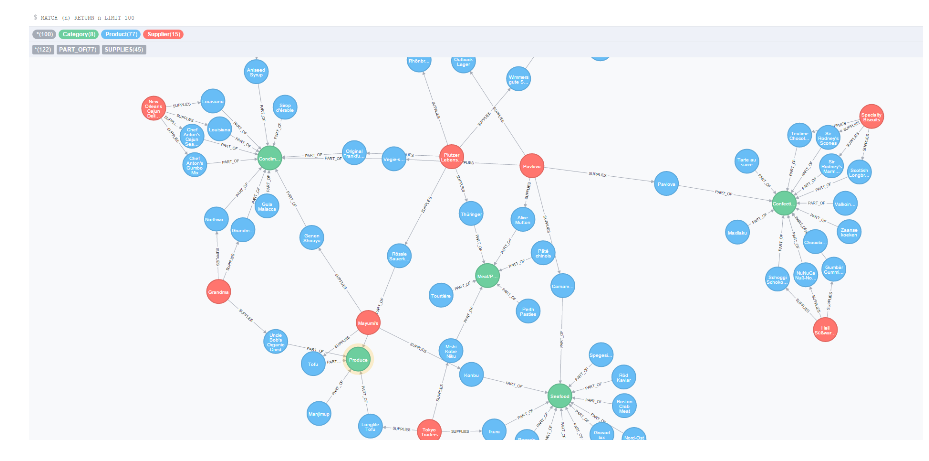

In [43]:
plotImage("q1.png")


It is also possible to know more about the relationships in the data base thanks to the following command:

    MATCH (a)-[r]->(b)
    WHERE labels(a) <> [] AND labels(b) <> []
    RETURN DISTINCT head(labels(a)) AS This, type(r) as To, head(labels(b)) AS That
    LIMIT 10

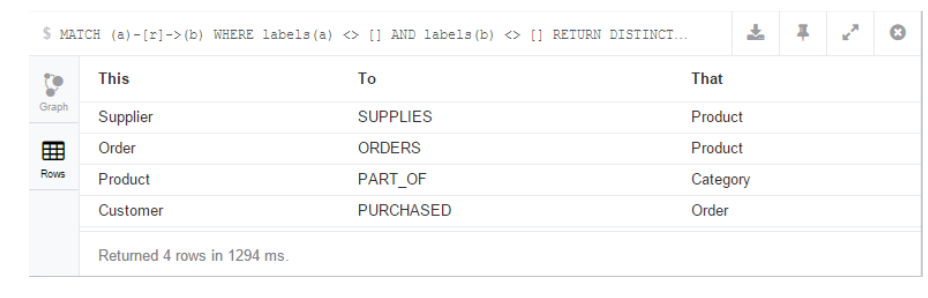

In [44]:
plotImage("q1relations.png")

## Exercise 6.2:

The customer with customerID ALFKI has made a number of orders containing some products. Return all the orders made by ALFKI and the products they contain.

### Answer

In order to find which products the customer ALFKI has ordered, we ran the following command:

    match (c:Customer{customerID : 'ALFKI' })-[:PURCHASED]->(o) 
    return c.customerID, o.orderID

This command return a graph which shows the customer ALFKI linked to nodes which represents the differents orders which are linked to the different products.

We can observe that ALFKI has done 6 orders.

Here is the graph

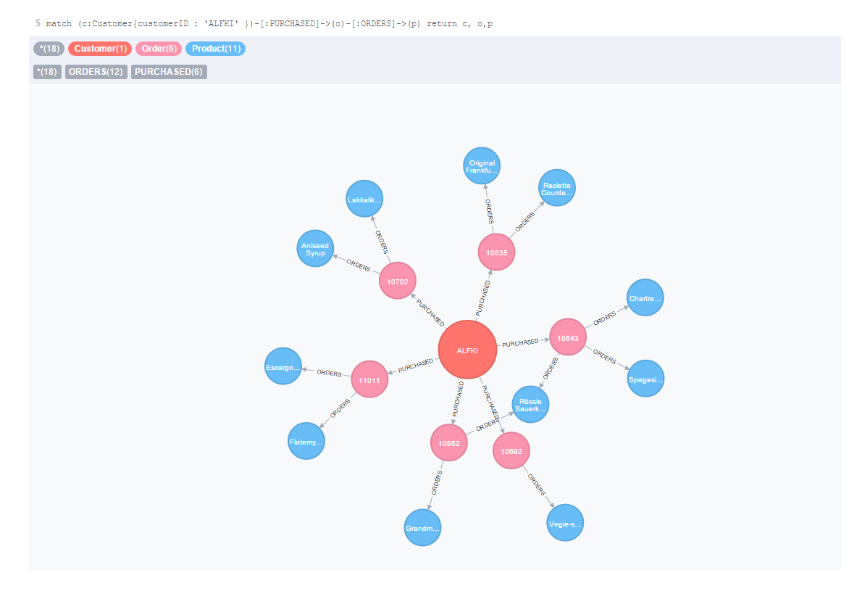

In [25]:
plotImage("q2.png")

## Exercise 6.3:

The customer with customerID ALFKI has made a number of orders containing some products. Return orders made by ALFKI that contain at least 2 products. Also return the products.

### answer

In order to show a graph which represents the only the order with at least two products, we used the following command:

    match (c:Customer{customerID : 'ALFKI' })-[:PURCHASED]->(o)-[r:ORDERS]->(p)
    with  o, count(p) as counts
    where counts > 1
    match (c:Customer{customerID : 'ALFKI' })-[:PURCHASED]->(o)-[r:ORDERS]->(p)
    return c,o, p

We can observe that this method shows only 5 orders. In order to show a graph and not a table, we have to use two MATCH commands.

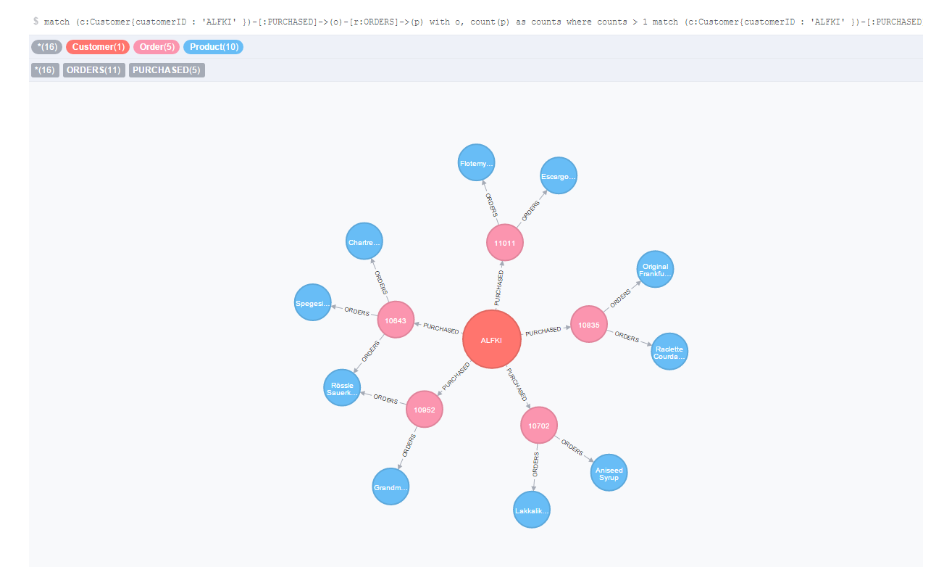

In [29]:
plotImage("q3.png")

It is also possible to return only these orders as table with fewer commands:

    match (c:Customer{customerID : 'ALFKI' })-[:PURCHASED]->(o)-[:ORDERS]->(p)
    with o, count(p) as numberofproducts
    where numberofproducts > 1
    return o.orderID, numberofproducts

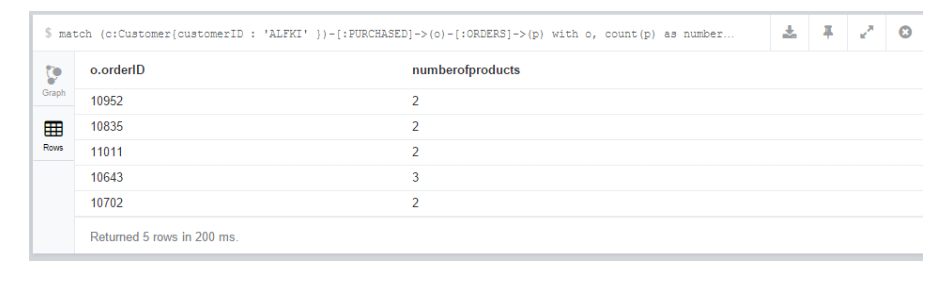

In [45]:
plotImage("q3table.png")

## Exercise 6.4:

Determine how many and who has ordered “Uncle Bob’s Organic Dried Pears” (productID 7).

### answer

First we used the following command:

``match(p:Product{productID : '7'})<-[:ORDERS]-(o:Order)<-[:PURCHASED]-(c:Customer)
return p, o , c``

This command return all the orders which include the product 7 and all the customers linked to these orders

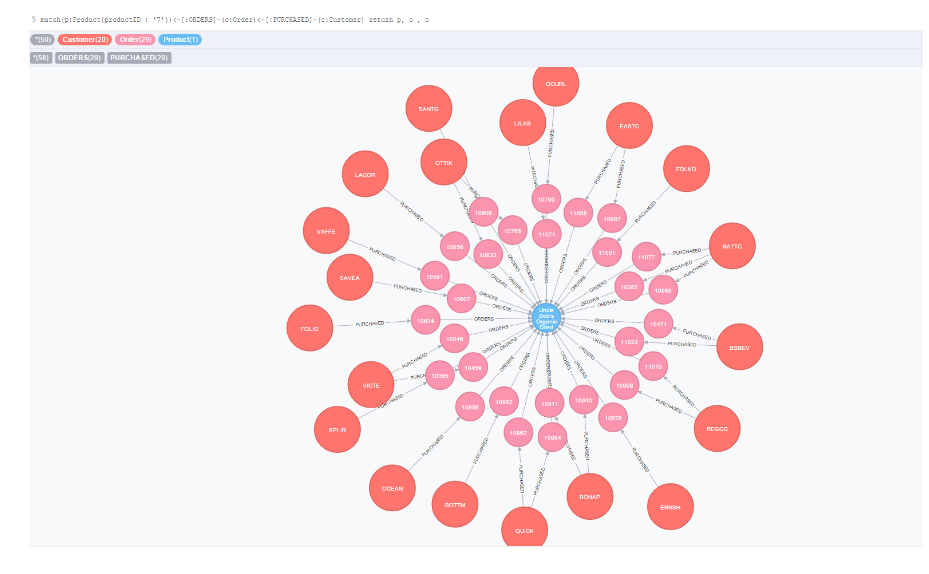

In [33]:
plotImage("q4graph.png")

The webUI shows us that there are 20 customers who have ordered this product, however we want to display directly this information as a result.

The following command can do it:


    match(p:Product{productID : '7'})<-[:ORDERS]-(o:Order)<-[:PURCHASED]-(c:Customer)
    with count(distinct c) as count
    return count


Here is the result:

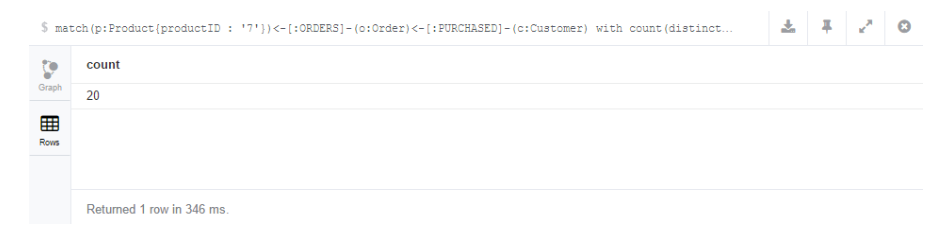

In [34]:
plotImage("q4count.png")

## Exercise 6.5:

How many different and which products have been ordered by customers who have also ordered “Uncle Bob’s Organic Dried Pears”?

### answer


First we can return a table of all the differents products:

    match(p:Product{productID : '7'})<-[:ORDERS]-(o:Order)<-[:PURCHASED]-(c:Customer)-[:PURCHASED]->(oo:Order)-[:ORDERS]->(pp:Product)

    return distinct pp.productName

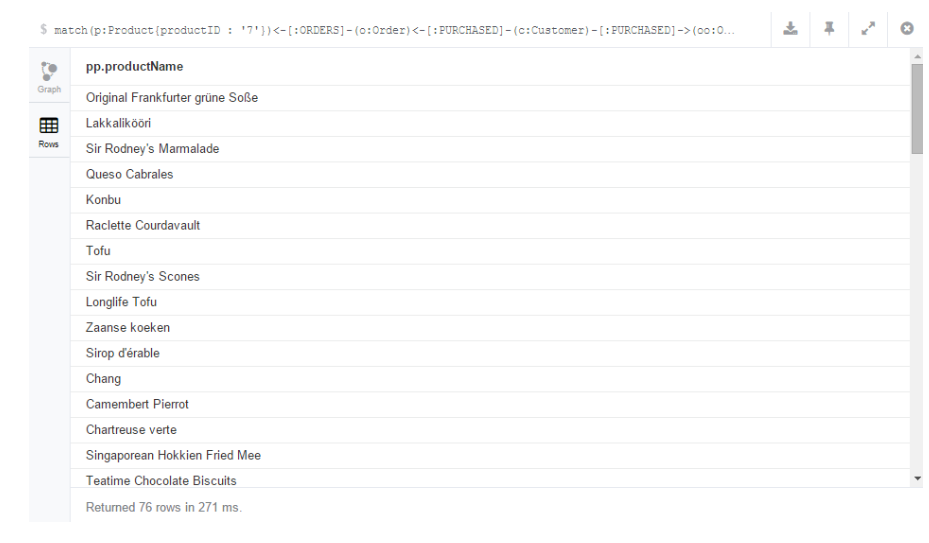

In [36]:
plotImage("q5products.png")

We can also count these products:


``match(p:Product{productID : '7'})<-[:ORDERS]-(o:Order)<-[:PURCHASED]-(c:Customer)-[:PURCHASED]->(oo:Order)-[:ORDERS]->(pp:Product)
return count(distinct pp)``


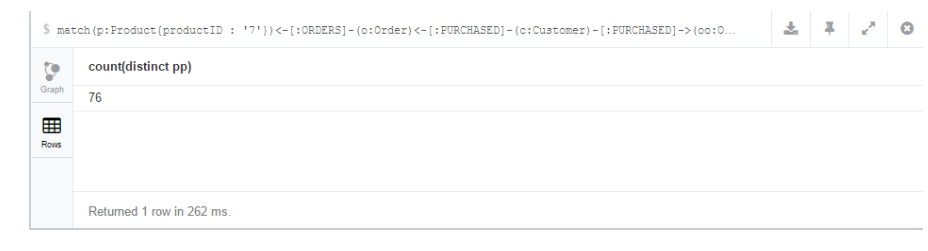

In [38]:
plotImage("q5count.png")

It is possible to return all the nodes which match this condition, however the graph is not pertinent here because there is too much nodes to display

    match(p:Product{productID : '7'})<-[:ORDERS]-(o:Order)<-[:PURCHASED]-(c:Customer)-[:PURCHASED]->(oo:Order)-[:ORDERS]->(pp:Product)
    return p, o, c, oo, pp



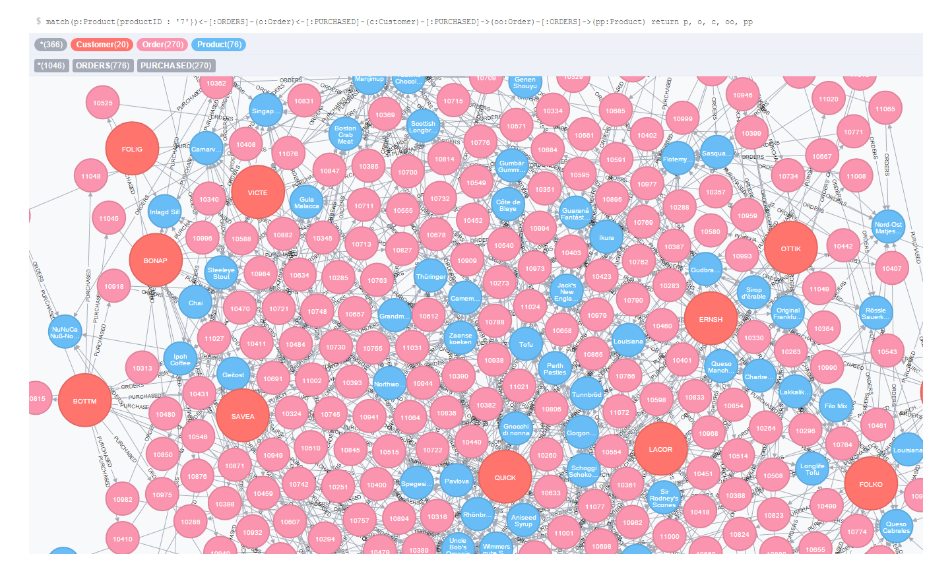

In [39]:
plotImage("q5graph.png")

## Exercise 6.6:

Of those products ordered by customers who have also ordered “Uncle Bob’s Organic Dried Pears”, which one has been ordered the most (by the same set of customers).

### answer

First we match all the customers who have also ordered “Uncle Bob’s Organic Dried Pears”, then from these customers we find which product they ordered, then we count the number of occurence for each product and we order the products by number of occurence:

    match(p:Product{productID : '7'})<-[:ORDERS]-(o:Order)<-[:PURCHASED]-(c:Customer)
    with c
    match (c:Customer)-[:PURCHASED]->(oo:Order)-[:ORDERS]->(pp:Product)
    return  distinct pp.productName, count(distinct oo ) as number_of_orders
    order by number_of_orders DESC

here is the result


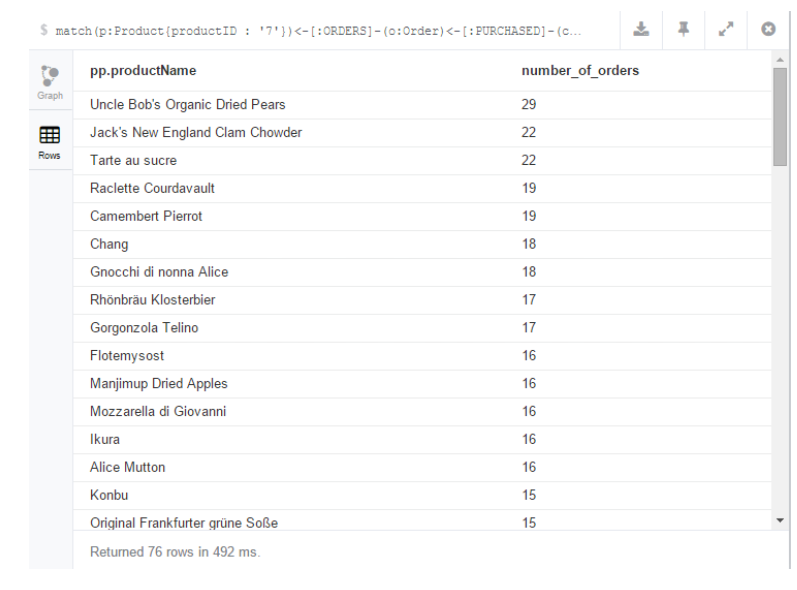

In [5]:
plotImage("q6.png")

## Exercise 6.7:

The customer with customerID ALFKI has bought a series of products. Determine which other customers have bought most of the same products.

### answer

First we want all the customers which are connected to products bougth by ALFKI, the following command do it:

    match (cc:Customer)-[:PURCHASED]->(oo)-[:ORDERS]->(pp)
    <-[:ORDERS]-()<-[:PURCHASED]-(c:Customer{customerID : 'ALFKI'})

Now, we have all these customers, connected to some products which are included in the serie of product bought by ALFKI.

Then we have to group these product for each customer and count them:

    with cc, count(distinct pp) as qty_of_product

Finally we count the number of distinct products for each customer and order the result:

    return cc.customerID, qty_of_product
    order by qty_of_product DESC``

Here is the whole command:

    match (cc:Customer)-[:PURCHASED]->(oo)-[:ORDERS]->(pp)
    <-[:ORDERS]-()<-[:PURCHASED]-(c:Customer{customerID : 'ALFKI'})
    with cc, count(distinct pp) as qty_of_product
    return cc.customerID, qty_of_product
    order by qty_of_product DESC

NB: this command doesn't return ALFKI


Here is the result:

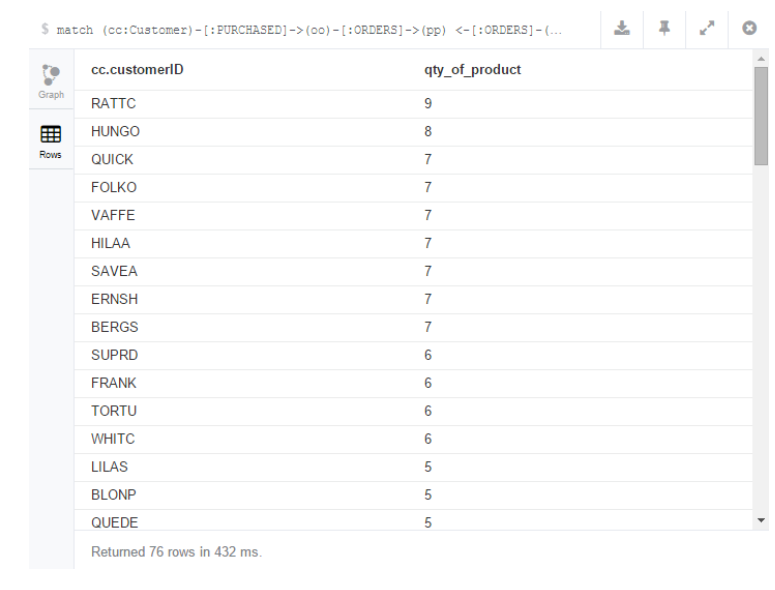

In [6]:
plotImage("q7.png")

# Week 7

## Exercise 7.1

Implement a Bloom Filter as a Python class. The class should have an add method which adds a string to the filter, and a lookup method which determines if a string is “in the filter”. The number of hash-functions in the filter should be m/n * ln(2), where m is the size of the bit-array and n is the expected number of distinct items in the stream. Use a filter with 1 million bits.

Write a script which looks through the Shakespeare text-file and for each word in the file determines if it is in the English dictionary. You should use this dictionary.

What is the speed difference between this approach, and simply looping over the dictionary for each word in Shakespeare?

Which words are reported to be in the dictionary but are actually not in there?

### Answer

#### load dictionary

In [3]:
# load the file
tmp = open('dict_w7', 'r').read()
dictionary = []
# clean the data and tokenize it
for s in tmp.split():
    dictionary.append( s.lower() )
    
print "the dictionary has %s words " %len(dictionary)

the dictionary has 235886 words 


#### load shakespeare file

In [4]:
import string
tmp = open('shakespeare.txt', 'r').read()

# exclude the punctuation
exclude = set(string.punctuation)
tmp = ''.join(ch for ch in tmp if ch not in exclude)

#tokenize and lower it
shakespeare = []
for t in tmp.split():
    shakespeare.append(t.lower())

#### Bloom Filter class

In [5]:
import mmh3
from bitarray import bitarray
import numpy as np

class BloomFilter:
    def __init__(self, m, k ):
        # create hash function
        hash_functions = []
        for i in range(0,k):
            f = lambda x: mmh3.hash( x , i)%m
            hash_functions.append( f ) 
        self.hashs = hash_functions
        # create bitarray and initialize
        self.size = m
        bits = bitarray(m)
        self.content = bits
        # set all elements to zero
        self.content.setall(False)
        
    # add an element  
    def add(self, value):
        for f in self.hashs:
            self.content[f(value)] = 1
        return
    # determine if the string is in the filter
    def lookup(self, value):
        # by default the value is inside
        isInside = True
        for f in self.hashs:
            # while we don't find, that the element isn't inside
            if isInside and not self.content[f(value)]:
                isInside = False
        return isInside

#### setup the Bloom Filter object: initializing & adding elements

In [6]:
# setup parameters
m = 10**6
# n = len(shakespeare.split())
n = len(dictionary)
k = int(float(m) / float(n) * np.log(2)  )
print "m: %s" %m
print "n: %s" %n
print "k: %s" %k

# create and fill the filter
bloom_filter = BloomFilter(m, k)
for s in dictionary:
    bloom_filter.add(s)

m: 1000000
n: 235886
k: 2


#### use the filter on the text in order to find the errors

In [72]:
# try it on shakespeare
import string
import time
mistakes_bloom = []
t_0 = time.time()
for s in shakespeare:
    if not bloom_filter.lookup( s ):
        mistakes_bloom.append(s)
t_bloom = (time.time() - t_0)
print "cost: %s s" %t_bloom
print "bloom filter detects: %s errors " % len(mistakes_bloom) 

cost: 0.00500011444092 s
bloom filter detects: 718 errors 


#### use the dictionary as the *list* to find the errors

In [74]:
# list method
mistakes_old_school = []
t_0 = time.time()
for s in shakespeare:
    if s not in dictionary:
        mistakes_old_school.append(s)
t_old_school = (time.time() - t_0)
print "cost: %s s" %t_old_school
print "list method detects: %s errors " % len(mistakes_old_school) 

false_positives = len(mistakes_old_school) - len(mistakes_bloom)
print "bloom filter return %s false positives" %false_positives
print "bloom filter return %s%% false positives" %( 100. * float(false_positives) / float(len(shakespeare)) )

print "bloom filter is %s times faster" %(t_old_school / t_bloom )

cost: 5.4359998703 s
list method detects: 889 errors 
bloom filter return 171 false positives
bloom filter return 5.21341463415% false positives
bloom filter is 1087.1750906 times faster


-------------
### Discussion

We can observe that the Bloom Filter is faster than the list method (1000 times faster). Moreover, the Bloom Filter, as a streaming algorithm, enables us to process all the data without storing the data.

However, the Bloom Filter produces false positives: here approximately 5% of false positives.

#### use the dictionary as a *set* to find the errors

In [75]:
# old school method
mistakes_old_school = []

set_dic = set(dictionary)
t_0 = time.time()
for s in shakespeare:
    if s not in set_dic:
        mistakes_old_school.append(s)
t_old_school = (time.time() - t_0)
print "cost: %s s" %t_old_school
print "old school method detects: %s errors " % len(mistakes_old_school) 

false_positives = len(mistakes_old_school) - len(mistakes_bloom)
print "bloom filter return %s false positives" %false_positives
print "bloom filter return %s%% false positives" %( 100. * float(false_positives) / float(len(shakespeare)) )

print "bloom filter is %s times faster" %(t_old_school / t_bloom )

cost: 0.0019998550415 s
old school method detects: 889 errors 
bloom filter return 171 false positives
bloom filter return 5.21341463415% false positives
bloom filter is 0.3999618539 times faster


-----------------
### Discussion

We can observe that the use of a set is faster than the Bloom filter.

However, if we observe the complexity for the operation:

x in s (for s a list or a set)

The documentation shows that the complexity is in O(n) for the list, and in O(1) for the set. Therefore this result is not anomalous. 

-------------
## Exercise 7.2

Implement the Flajolet-Martin algorithm to determine the number of distinct words in this Shakespeare file. You should implement it as a class with (at least) the two methods process(element) which reads in an element and adds it to the datastructure, and give_estimate() which gives an estimate of the amount of distinct elements processed.

The idea is to construct a class which does not need to store much, so make sure that you are not saving some large amount of elements in the class.

Note: Single cardinality estimates are prone to outliers. To improve the accuracy, follow the solution described in this wikipedia article under “Improving accuracy”.


### load the text as a set

In [223]:
import string
tmp = open('shakespeare.txt', 'r').read()

# exclude the punctuation
exclude = set(string.punctuation)
tmp = ''.join(ch for ch in tmp if ch not in exclude)

# tokenize and lower
shakespeare = []
for t in tmp.split():
    shakespeare.append(t.lower())

# convert to set (save time on the process methods)
shakespeare = set(shakespeare)

### define the FM_algo class: an implementation of the basic Flajolet-Martin Algorithm

See the comments in the code for the explenations

In [76]:
import mmh3
from bitarray import bitarray
import random
PHI = 0.77351

# convert an integer into its binary representation (stored as integer)
def toBin(n):
        return int(bin(n)[2:])

class FM_algo:
    # initialize the class
    def __init__(self, r = None ):
        l = 32 # length of an integer
        if not r: # choice of a random seed if it is not defined
            r = random.choice(range(0,500))   
        self.f = lambda x : mmh3.hash(x,r) % 2**l # hash function: hash an element in the range [0, 2**l]
        self.length = l
        self.bitmap = bitarray( l+1 ) 
        # initialize all values to 0
        self.bitmap.setall(False)
        
    def trailing_zeroes(self, num):
    #"""Counts the number of trailing 0 bits in num."""
        if num == 0:
            return 32 # Assumes 32 bit integer inputs!
        p = 0
        while (num >> p) & 1 == 0:
            p += 1
        return p
    
    # rho function from wikipedia
    def rho(self, num):
            return self.trailing_zeroes(num)   
      
    # process an element 
    def process(self, element):
        h = self.f(element) # hash the element
        i = self.rho(  toBin(h)  ) # convert to binary and count the trailing zeros
        self.bitmap[i] = 1 # set an element in the bitmap to one
        
    def give_estimate(self):
        R = self.bitmap.index(False) # find the first index = 0 with a built-in function (bitarray)
        return float(2**R) / PHI

### try the FM_algo class on the text

In [85]:
import time 

t0 = time.time()

# choose a random seed for the h function
r = random.choice(range(0,100))
# create an object FM_algo
FM = FM_algo( r )

#add each elements and process
for w in shakespeare:
    FM.process(w)
    
t1 = time.time() 
print "all element processed in: %ss" %(time.time() - t0)
#give an estimation
n_FM = float(FM.give_estimate())
n_real = float(len(set(shakespeare)))
r = 100. * ( abs(n_real - n_FM) / n_real )
print "evaluated in: %ss" %(time.time() - t1)
print "FM gives %s distinct elements" %int(n_FM)
print "old school method gives %s distinct elements" %int(n_real)
print
print "error:%s%% " %r

all element processed in: 0.0160000324249s
evaluated in: 0.0s
FM gives 5295 distinct elements
old school method gives 3280 distinct elements

error:61.4433540361% 


-------------------------
This algorithm enables us to approximate the cardinality of a set without storing all the elements. Moreover, the evaluation is extremely quick.

**However**, the results stay in the range {2**i/PHI, i in N } and the precision is highly variable. 

### dispersion of the result from the FM_algo class on 100 tries

difference between the average of the results and the real cardinality: 23.7059700302%


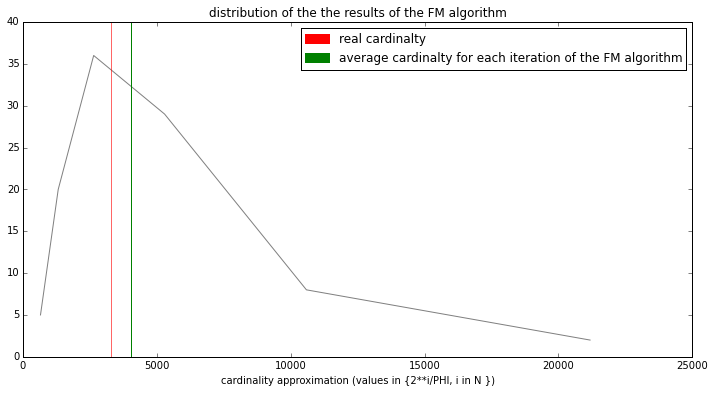

In [187]:
# run 100 times the FM algorithm and draw the distribution

import matplotlib.patches as mpatches
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

y = dict()
n = 100
all_values = []

average = 0.0
for i in range(0,n):
    r = random.choice(range(0,100))
    FM = FM_algo( r )

    for w in shakespeare:
        FM.process(w)
    s = float(FM.give_estimate())
    all_values.append( s )
    if s in y.keys():
        y[s] += 1
    else:
        y[s] = 1 
    average += s
    
average /= float(n)

r = 100. * ( abs(n_real - average) / n_real ) 
print "difference between the average of the results and the real cardinality: %s%%"%r
# draw
xx = sorted(y.keys())
yy = [y[x] for x in xx]
plt.plot(xx, yy, 'gray')
plt.axvline(average, color='g')
plt.axvline(n_real, color='red', alpha = 0.6)

red_patch = mpatches.Patch(color='red', label='real cardinalty')
green_patch = mpatches.Patch(color='green', label='average cardinalty for each iteration of the FM algorithm')
plt.legend(handles=[red_patch, green_patch])

plt.xlabel( u'cardinality approximation (values in {2**i/PHI, i in N })')
plt.ylabel('')
plt.title('distribution of the the results of the FM algorithm')

-----------------
This graph shows **the distribution of the results for the Flajolet-Martin algorithm for 100 tries**. The average value shows that one can approximate precisely the real cardinality because the FM algorithm is probabilistic but converge to the real cardinality.

## Improve the accuracy

First we analyse the use of the averaging of multiple samples in order to improve our algorithm. 

Then we use the median of multiples sample to improve the basic algorithm. 

Finally we use these two methods to build an accurate and more stable method.

### Improve the accuracy: use an average of FM algorithms

In [107]:
class FM_algo_average:
    # k: number of childs FM_algo
    def __init__(self, k):
        fms = []
        for i in range(0,k): # initialize childs
            fms.append(FM_algo())
        self.childs = fms
        
    def process(self, element): # add an element and process
        for c in self.childs:
            c.process(element)
            
    def give_estimate(self): # compute the average of all the childs
        S = 0.
        for c in self.childs:
            S += c.give_estimate()
        S = S /  float(len(self.childs))
        return S
    
    def draw_estimate(self, y =1): # visualization of the results
        for c in self.childs:
            plt.scatter(c.give_estimate(), y,color = 'k', alpha = 0.5)
            


In [190]:
# test it
import time 
k = 10
t0 = time.time()

r = int(30*random.random())
FM = FM_algo_average(  k )

# process each element 
for w in shakespeare:
    FM.process(w)
    
t1 = time.time()
print "all element processed in: %ss" %(time.time() - t0)

#estimate the cardinality
n_FM = float(FM.give_estimate())
n_real = float(len(set(shakespeare)))
r = 100. * ( abs(n_real - n_FM) / n_real )
print "evaluated in: %ss" %(time.time() - t1)
print "FM gives %s distinct elements" %int(n_FM)
print "there is %s distinct elements" %int(n_real)
print
print "error:%s%% " %r

all element processed in: 0.137000083923s
evaluated in: 0.000999927520752s
FM gives 3706 distinct elements
there is 3280 distinct elements

error:13.0103478253% 


#### discussion on the FM_algo with the average

This method returns more precise results. However, according to wikipedia: *averaging is very susceptible to outliers*. Indeed the result varies from in a range of 0% to 60% with 10 samples.

This method enables us to access to more precise values by increasing the number of samples. Indeed the results seem to be normally distributed, therefore the result should converge to the mean: the real cardinality.

### Improve the accuracy: use the median of FM algorithms

In [200]:
class FM_algo_median:
    def __init__(self, k ):
        fms = []
        for i in range(0,k): # initialize childs
            fms.append(FM_algo( ))
        self.childs = fms
        
    def process(self, element): # process element (process in each child)
        for c in self.childs:
            c.process(element)
            
    def give_estimate(self): # return the median of the childs
        results = []
        for c in self.childs:
            results.append( c.give_estimate() )
        return np.median(results) 
    
    def draw_estimate(self, y =1): # draw a visualization of the results.
        x = []
        yy = []
        for c in self.childs:
            x.append( c.give_estimate() )
            yy.append(y)
        plt.scatter(x, yy,color = 'k', alpha = 0.1)
        plt.scatter(np.median( x ), y , color = 'blue', alpha = 0.7)

In [222]:
import time 
k = 10
t0 = time.time()

r = int(30*random.random())
FM = FM_algo_median(  k )

for w in shakespeare:
    FM.process(w)
t1 = time.time()
print "all element processed in: %ss" %(time.time() - t0) 
n_FM = float(FM.give_estimate())
n_real = float(len(set(shakespeare)))
r = 100. * ( abs(n_real - n_FM) / n_real )
print "evaluated in: %ss" %(time.time() - t1)
print "FM gives %s distinct elements" %int(n_FM)
print "there is %s distinct elements" %int(n_real)
print
print "error:%s%% " %r

all element processed in: 0.142999887466s
evaluated in: 0.000999927520752s
FM gives 2647 distinct elements
there is 3280 distinct elements

error:19.2783229819% 


#### discussion on the FM_algo with median 

This algorithm returns mainly a result with an error of 19.28%, this method seems to be more stable. This precise value is explained because all the results stay in the range {2**i/PHI, i in N }.

So averaging enable us to access to more precise values, using the median enable us to return more stable results.

Now we will combine these two methods.

### improve the accuracy: most efficient solution

#### use the average and the median in a unique method

In [202]:
import numpy as np
#take the average of n groups of the medians from groups of k F-M objects
class FM_algo_accurate:
    def __init__(self, k , n):
        fms = []
        # initialize childs
        for i in range(0,n):
            fms.append(FM_algo_median(k)) # FM_algo_median: compute then median of the results from k FM_algo childs
            
        self.childs = fms
    def process(self, element):
        for c in self.childs:
            c.process(element)
    def give_estimate(self): # return the average of the childs
        S = 0.
        # return the average of all the child results
        for c in self.childs:
            S += c.give_estimate()
        S = S /  float(len(self.childs))
        return S
    
    # display a visualization of the results
    def draw_estimate(self):
        i = 0
        for c in self.childs:
            c.draw_estimate(i)
            i += 1
    

In [220]:
import time 

k = 10 # number of elements of each group
n = 100 # number of groups
t0 = time.time()

# initialize the object
FM = FM_algo_accurate(  k,n )

#process each element
for w in shakespeare:
    FM.process(w)
    
t1 = time.time()
print "all element processed in: %ss" %(time.time() - t0) 

# give an estimation
n_FM = float(FM.give_estimate())

# display the result
n_real = float(len(set(shakespeare)))
r = 100. * ( abs(n_real - n_FM) / n_real )
print "evaluated in: %ss" %(time.time() - t1)
print "FM gives %s distinct elements" %int(n_FM)
print "there is %s distinct elements" %int(n_real)
print 
print "error:%s%% " %r

all element processed in: 12.5759999752s
evaluated in: 0.00499987602234s
FM gives 3276 distinct elements
there is 3280 distinct elements

error:0.106924690144% 


#### Discussion 

This method combines the two previous methods: average and median.

The class contains n objects FM_algo_median with k childs, the FM_algo_median returns the median from the k results given by its childs (FM_algo).

Each object FM_algo_median "filters" the outliers. Then the average of these results enables us to access with an higher probability to a precise value.

Indeed, this algorithm returns mainly an error in a range from 0% to 5%. On this try the algorithm returns a value of 0.106924690144%, which is highly precise: a difference of only 4 elements on a set of 3280 elements. 

The cost in time is quite good, an evaluation of the cardinality for a set of 3280 elements costs only  0.005s without storing the elements. This object stores only 1000 (n * k) bitarrays of 32 elements (32 Kb).


### A Visual representation of the improved FM algorithm

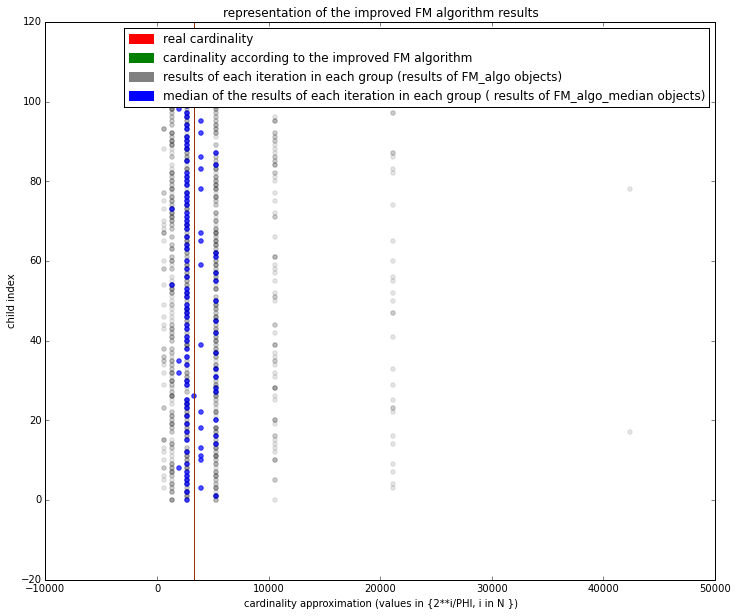

In [221]:
import matplotlib.patches as mpatches
matplotlib.rcParams['figure.figsize'] = (12.0, 10.0)
FM.draw_estimate()
plt.axvline(n_FM, color='g')
plt.axvline(n_real, color='red', alpha = 0.6)
red_patch = mpatches.Patch(color='red', label='real cardinality')
gray_patch = mpatches.Patch(color='gray', label='results of each iteration in each group (results of FM_algo objects)')
blue_patch = mpatches.Patch(color='blue', label='median of the results of each iteration in each group ( results of FM_algo_median objects)')
green_patch = mpatches.Patch(color='green', label='cardinality according to the improved FM algorithm')
plt.legend(handles=[red_patch, green_patch, gray_patch, blue_patch])

plt.xlabel( u'cardinality approximation (values in {2**i/PHI, i in N })')
plt.ylabel('group index')
plt.title('representation of the improved FM algorithm results')

The X axis represents the cardinality, the Y axis represents the group index (the index of each FM_algo_median object).

On each row are shown, in gray, the results from each FM_algo objects: the childs of the FM_algo_median objects. In blue are represented the median of each row: the results of the FM_algo_median objects.

Then, the green vertical line corresponds to the result of our algorithm, this is the average in the X axis of all the blue dots (the FM_algo_median result).

NB: The green line and the red line are on the same X value